**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict


import seaborn as sns

from sklearn.utils import shuffle
import itertools
import re

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Preparation

In [4]:
X_train1 = pd.read_csv("X_train_minmax_norm_VC.csv", sep = ',',  delim_whitespace=False)
y_train1 = pd.read_csv("y_train_minmax_norm_VC.csv", sep = ',',  delim_whitespace=False)
X_test1 = pd.read_csv("X_test_minmax_norm_VC.csv", sep = ',',  delim_whitespace=False) 
y_test1 = pd.read_csv("y_test_minmax_norm_VC.csv", sep = ',',  delim_whitespace=False) 

In [5]:
#eliminiamo tutte le colonne con soli valori nulli
X_train1.dropna(axis='columns', how='all', inplace=True)

In [6]:
#eliminiamo tutte le colonne con soli valori nulli
X_test1.dropna(axis='columns', how='all', inplace=True)

In [7]:
y_train1 = y_train1.values
y_test1 = y_test1.values
X_test1 = X_test1.values
X_train1 = X_train1.values

In [14]:
X_train1 

array([[0.1078396 , 0.38587085, 0.43597061, ..., 0.        , 1.        ,
        0.        ],
       [0.11764598, 0.38579238, 0.43587772, ..., 1.        , 1.        ,
        0.        ],
       [0.09803321, 0.3858833 , 0.43598928, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17647203, 0.38496259, 0.43497462, ..., 1.        , 0.        ,
        1.        ],
       [0.27451136, 0.38528169, 0.43533487, ..., 0.        , 0.        ,
        1.        ],
       [0.20587893, 0.38500252, 0.4350318 , ..., 1.        , 0.        ,
        1.        ]])

# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca.fit(X_train1)
X_pca = pca.transform(X_train1)

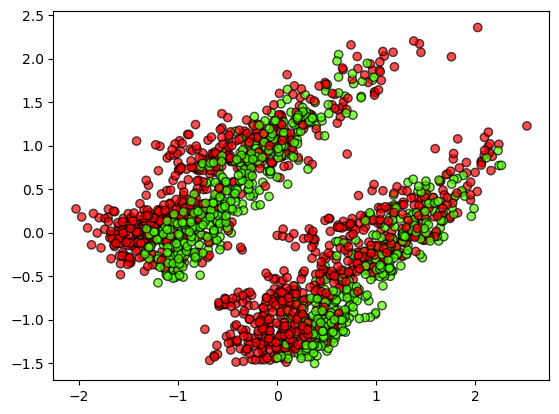

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train1, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Linear SVM

In [10]:
from sklearn.svm import LinearSVC

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [12]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9535256410256411
F1-score [0.96032832 0.94390716]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       360
         1.0       0.96      0.92      0.94       264

    accuracy                           0.95       624
   macro avg       0.96      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.7964743589743589
F1-score [0.84970414 0.68486352]
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       360
         1.0       0.99      0.52      0.68       264

    accuracy                           0.80       624
   macro avg       0.87      0.76      0.77       624
weighted avg       0.85      0.80      0.78       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9278846153846154
F1-score [0.93975904 0.91017964]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       360
         1.0       0.96      0.86      0.91       264

    accuracy                           0.93       624
   macro avg       0.93      0.92      0.92       624
weighted avg       0.93      0.93      0.93       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
decision_function = clf.decision_function(X_train1)
support_vector_indices = np.where((2 * y_train1 - 1) * decision_function <= 1)[0]
support_vectors = X_train1[support_vector_indices]

In [16]:
support_vectors_pca = pca.transform(support_vectors)

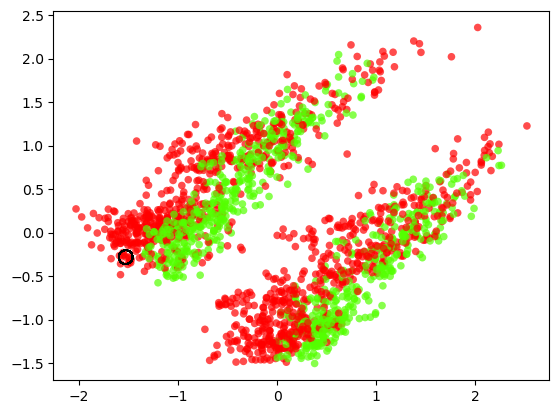

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train1, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [18]:
clf.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 0.001,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': 42,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 89,
 'classes_': array([0., 1.]),
 'coef_': array([[ 0.30327919,  0.01079565,  0.01217296,  0.01461089,  0.04181645,
         -0.01544151,  0.01913731, -0.00923188, -0.05891237,  0.00717955,
          0.13161722,  0.03172523,  0.0024202 , -0.12991324,  0.01261747,
          0.01869492,  0.01851653, -0.01027254,  0.04638151, -0.02865701,
          0.04008863,  0.0254975 , -0.06173831,  0.03364861,  0.00485996,
         -0.0109723 , -0.03267679,  0.02316742,  0.05037881, -0.06260424,
         -0.06623287, -0.07167878,  0.0725194 ,  0.08235764, -0.14495665,
          0.00974922, -0.07120122,  0.05740621, -0.07905722,  0.05517583,
         -0.06909845, -0.20940324, -0.0593887 , -0.04613829,  0.04275323,
          0.05909699, -0.01165061,

## Effect of C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


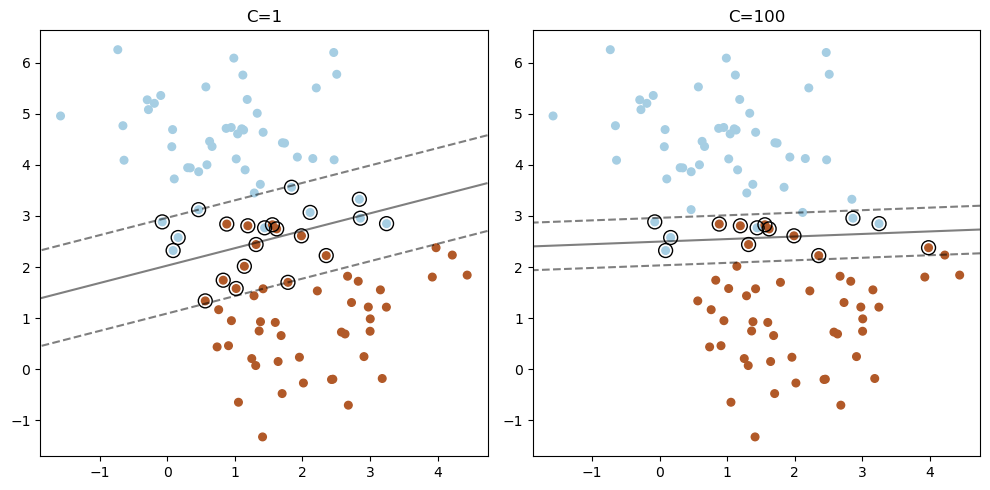

In [19]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X_train1, y_train1= make_blobs(n_samples=100, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train1, y_train1)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train1)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y_train1 - 1) * decision_function <= 1)[0]
    support_vectors = X_train1[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    #plt.scatter(clf.coef_[:, 0] + clf.intercept_, clf.coef_[:, 1] + clf.intercept_)
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [13]:
clf = SVC(gamma='auto')
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.967948717948718
F1-score [0.97222222 0.96212121]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       360
         1.0       0.96      0.96      0.96       264

    accuracy                           0.97       624
   macro avg       0.97      0.97      0.97       624
weighted avg       0.97      0.97      0.97       624



In [14]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.7724358974358975
F1-score [0.83488372 0.63402062]
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.83       360
         1.0       0.99      0.47      0.63       264

    accuracy                           0.77       624
   macro avg       0.85      0.73      0.73       624
weighted avg       0.83      0.77      0.75       624



In [15]:
clf.support_

array([   4,    5,    6, ..., 1765, 1766, 1767], dtype=int32)

In [16]:
support_vectors_pca = pca.transform(clf.support_vectors_)

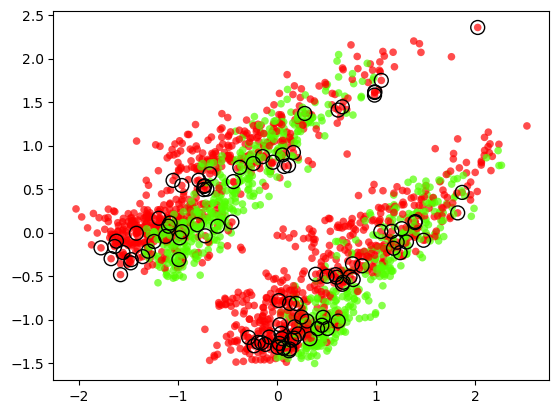

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train1, 
            cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [18]:
clf.n_support_, len(X_train1)

(array([752, 748], dtype=int32), 1828)

In [9]:
X_train1.shape

(1828, 89)

In [10]:
X_test1.shape

(624, 89)

In [13]:
X_train2=X_train1.reshape(-1)

In [14]:
X_test2=X_test1.reshape(-1)

## Effect of Different Kernels

In [16]:



X = X_train2
y = X_test2

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train1 = X[:int(.9 * n_sample)]
y_train1 = y[:int(.9 * n_sample)]
X_test1 = X[int(.9 * n_sample):]
y_test1 = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train1, y_train1)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test1[:, 0], X_test1[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed